<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

## Submission Exercise
Perform preliminary investigation on the given Test set of the Big Mart Sales dataset. Complete each of the task using python code, and text discussion when necessary. Submit the completed notebook by 21/11/2023 (Tuesday), 11.59pm for your Week 3 Tutorial attendance.

### Ilyani Shahnaz binti Shukor
1201101761 <br>
TC1L/TT1L



---



### For Google Colab Use Only
Skip this section if you are using Jupyter Notebook etc.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# drive_path = '/content/drive/MyDrive/Trimester/2310/TDS3301/Tutorials/Tutorial 2/' #set your google drive path

---

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Read data

Investigate the given Big Mart Sales, Test set.

In [5]:
df = pd.read_csv("BigMartSales/test.csv")

### Task 1

What are the differences in features and number of samples between this Test set with the Train set? <br>
Use python code to check and show the rows and columns, then state the differences.

In [6]:
#Test set
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
#Train set 
df1 = pd.read_csv('BigMartSales/train.csv')
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
print('# of Rows for Test set: ', df.shape[0])
print('# of Rows for Train set: ', df1.shape[0])
print('# of columns for Test set: ', df.shape[1])
print('# of columns for Train set: ', df1.shape[1])

# of Rows for Test set:  5681
# of Rows for Train set:  8523
# of columns for Test set:  11
# of columns for Train set:  12


In [9]:
#Check previous value before data preprocessing as seen in the first row in the train set.
df[df['Item_Identifier']=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1115,FDA15,9.3,Low Fat,0.016022,Dairy,249.9092,OUT046,1997,Small,Tier 1,Supermarket Type1


In [10]:
#Check for unique values in the Item_Fat_Content to see if the values undergo any data preprocessing
unique_values = df1['Item_Fat_Content'].unique()
print(unique_values)
unique_values1 = df['Item_Fat_Content'].unique()
print(unique_values1)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [11]:
print(df.columns)
print(df1.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


Main difference is the number of rows & columns between the test set `(5681, 11)` and train set `(8523,12)`. There is an additional column in train set `Item_Outlet_Sales`. Comparing the train and test set, it is observed that the data values in the train set is standardized as compared to the test set. For example, the values in the `Item_Weight` is set to two decimal places.

### Task 2

Check and verify the data attribute types of the Test set. If necessary, convert them into the proper data type.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], errors='coerce')

Data types assigned for each of the attribute is already appropriately casted. 

### Task 3
Check for missing data and perform cleaning on the Test set.
You can either remove the data with missing values, or fill in the missing data with some value. Justify your choices and implement in the code.

In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
#Fill the nulls in Item_Weight column with the average values & the Outlet_Size column with the value with the highest frequency(mode))
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Justification: The dataset is considered small with only 5681 rows. Filling the null values instead of completely removing the rows can retain the completeness of the data  

### Task 4
Check the measures of central tendency of the numerical attributes (except `Outlet_Establishment_Year`) of the Test set, before the cleaning, and after the cleaning. Are they similar or significantly different?
Show the measures (mean, median, etc.) and discuss.

In [14]:
#Load test set before cleaning
df_preclean = pd.read_csv("BigMartSales/test.csv")

In [18]:
display(df_preclean.select_dtypes(include="object").describe())
display(df.select_dtypes(include="object").describe())
display(df_preclean.select_dtypes(include="float64").describe())
display(df.select_dtypes(include="float64").describe())

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


,Item_Weight,Item_Visibility,Item_MRP
count,4705.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273
std,4.664849,0.051252,61.809091
min,4.555000,0.000000,31.990000
25%,8.645000,0.027047,94.412000
50%,12.500000,0.054154,141.415400
75%,16.700000,0.093463,186.026600
max,21.350000,0.323637,266.588400


,Item_Weight,Item_Visibility,Item_MRP
count,4705.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273
std,4.664849,0.051252,61.809091
min,4.555000,0.000000,31.990000
25%,8.645000,0.027047,94.412000
50%,12.500000,0.054154,141.415400
75%,16.700000,0.093463,186.026600
max,21.350000,0.323637,266.588400


In [16]:
numcol = df.drop('Outlet_Establishment_Year', axis=1).columns
numcol1 = df_preclean.drop('Outlet_Establishment_Year', axis=1).columns

In [17]:
#Check measures of central tendency for the test set before cleaning
df_preclean[numcol1].describe()

,Item_Weight,Item_Visibility,Item_MRP
count,4705.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273
std,4.664849,0.051252,61.809091
min,4.555000,0.000000,31.990000
25%,8.645000,0.027047,94.412000
50%,12.500000,0.054154,141.415400
75%,16.700000,0.093463,186.026600
max,21.350000,0.323637,266.588400


In [18]:
#Check measures of central tendency for the test set after cleaning
df[numcol].describe()

,Item_Weight,Item_Visibility,Item_MRP
count,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273
std,4.245189,0.051252,61.809091
min,4.555000,0.000000,31.990000
25%,9.195000,0.027047,94.412000
50%,12.695633,0.054154,141.415400
75%,15.850000,0.093463,186.026600
max,21.350000,0.323637,266.588400


In [19]:
print("Mean of Item Weight column before cleaning: ", df_preclean['Item_Weight'].mean())
print("Mean of Item Weight column after cleaning: ", df['Item_Weight'].mean())
print()
print("Median of Item Weight column before cleaning: ", df_preclean['Item_Weight'].median())
print("Median of Item Weight column after cleaning: ", df['Item_Weight'].median())
print()
print("Mode of Item Weight column before cleaning: ", df_preclean['Item_Weight'].mode().tolist())
print("Mode of Item Weight column after cleaning: ", df['Item_Weight'].mode().tolist())

Mean of Item Weight column before cleaning:  12.695633368756642
Mean of Item Weight column after cleaning:  12.69563336875664

Median of Item Weight column before cleaning:  12.5
Median of Item Weight column after cleaning:  12.695633368756642

Mode of Item Weight column before cleaning:  [10.5]
Mode of Item Weight column after cleaning:  [12.695633368756642]


Discussion: From the describe function, we can see that the primary difference is seen in the `Item Weight` column primarily due to the null-values in the column being handled by replacing them with the mean value of the Item Weight. Comparing the measures of central tendency (Mode, Median, Mean), there isn't significant difference between the values of the median and the mean before and after the data was pre-processed. There is a difference in the mode, which might be due to the increase of non-null values after the data was handled. From the measures, we can see that the mean of the column before cleaning is more than the median, and the median is bigger than mode (Mode < Median < Mean) indicating that the distribution is skewed to the right. After cleaning, the mean, median and mode is equal (Mean = Mode = Median) indicating a symmetrical distribution.

### Task 5

Plot the histrograms and density plot for the numerical attributes (except `Outlet_Establishment_Year`) of the Test set before and after cleaning. Do you observe any differences? Discuss.

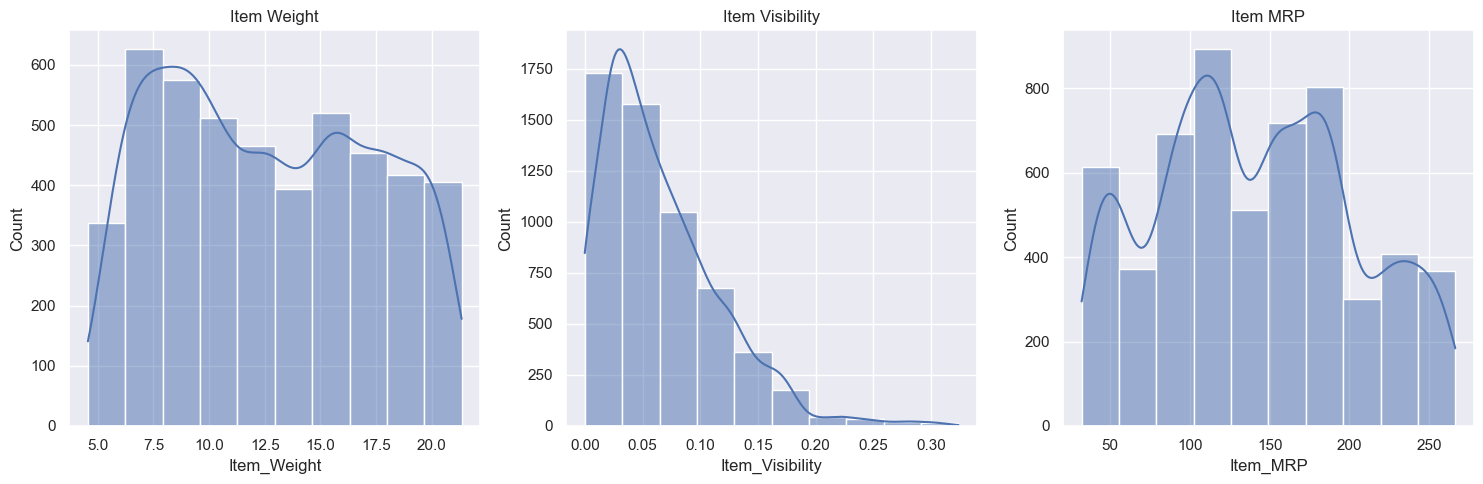

In [20]:
#Histogram of Test set before cleaning
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_preclean["Item_Weight"], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Item Weight')

sns.histplot(df_preclean["Item_Visibility"], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Item Visibility')

sns.histplot(df_preclean["Item_MRP"], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Item MRP')

plt.tight_layout()
plt.show()

In [ ]:
#num_col = df_preclean.select_dtypes(include="float64") - To select numerical attributes

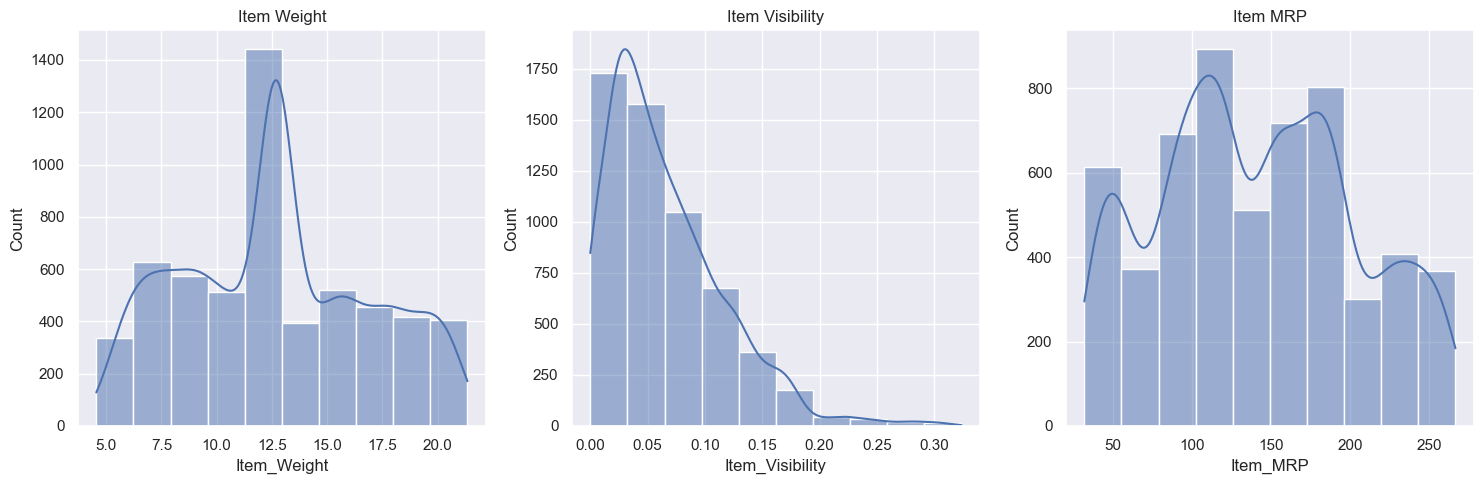

In [21]:
#Histogram of Test set after cleaning
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df["Item_Weight"], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Item Weight')

sns.histplot(df["Item_Visibility"], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Item Visibility')

sns.histplot(df["Item_MRP"], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Item MRP')

plt.tight_layout()
plt.show()

Discussion: The main difference is seen in the Item_Weight column. It is observed that the histogram is highly sparse after cleaning in comparison to the dataset before cleaning. This is due to the mode difference between the test set before cleaning and after cleaning. 

### Task 6

Check the skewness of the numerical attributes (except `Outlet_Establishment_Year`) of the cleaned Test set. Discuss their skewness (positive, negative, etc.)

In [22]:
print("Skewness of Item Weight: ", df["Item_Weight"].skew())
print("Skewness of Item Visibility: ", df["Item_Visibility"].skew())
print("Skewness of Item MRP: ", df["Item_MRP"].skew())

Skewness of Item Weight:  0.1428133167932425
Skewness of Item Visibility:  1.2383124276598971
Skewness of Item MRP:  0.13618153880370937


Discussion: The `Item Weight` column has a slight positive skewness, and from the histogram plot, it is observed to be fairly symmetrical. As for the `Item Visibility` column, it is observed that it has a significant positive skewness and as observed from the histogram that it is highly skewed to the right. Lastly, the `Item MRP` column has a slight positive skewness, and as observed from the histogram, it is roughly symmetrical.

### Task 7

Plot a bar plot for the attributes `Outlet_Size`, `Outlet_Location_Type`, and `Outlet_Type`. Are the categories balanced for all 3 attributes? Discuss.

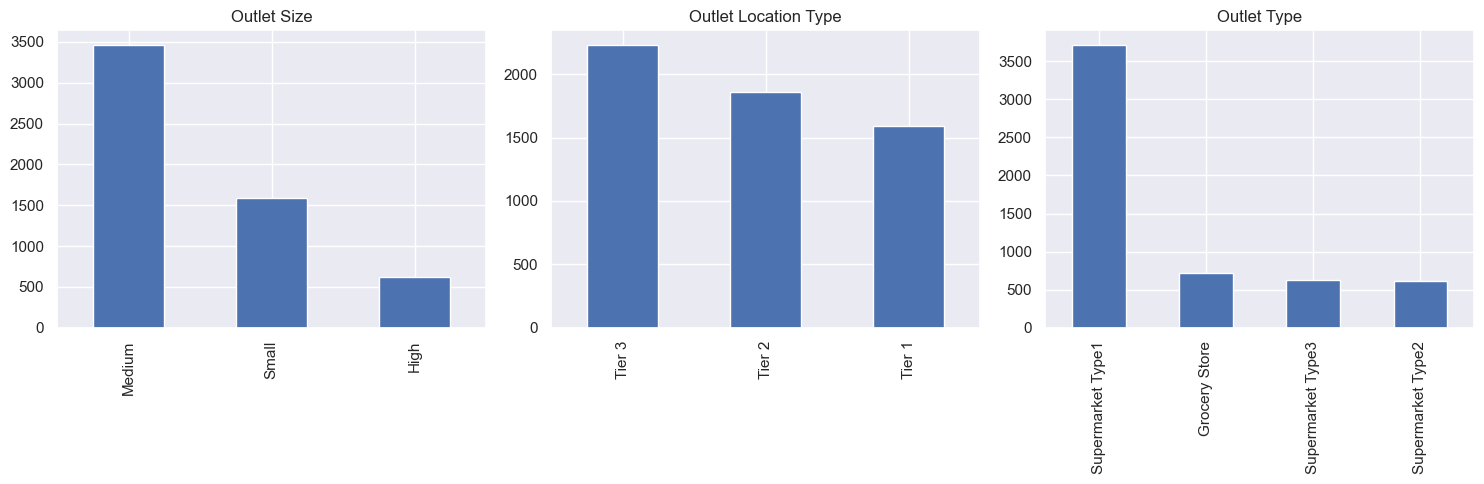

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df["Outlet_Size"].value_counts().plot(kind="bar")
plt.title('Outlet Size')


plt.subplot(1, 3, 2)
df["Outlet_Location_Type"].value_counts().plot(kind="bar")
plt.title('Outlet Location Type')


plt.subplot(1, 3, 3)
df["Outlet_Type"].value_counts().plot(kind="bar")
plt.title('Outlet Type')

plt.tight_layout()
plt.show()


#Using groupby works too

Discussion: 
1) Outlet Size </br>
As observed from the bar plot, there is a significant imbalance in all of the categories. It is seen that *Medium* attribute has the highest frequency count, followed by *Small* and *High*, with a significant difference in the frequency count between the attributes.

2) Outlet Location Type </br>
As observed from the bar plot, there is a slight imbalance in the categories, with smaller gaps in the frequency count between the attributes.

3) Outlet type </br>
As observed, there is a significant imbalance between *Supermarket Type 1* with the rest of the categories. The categories (*Grocery Store, Supermarket Type 3 and Supermarket Type 2*) are fairly balanced.

### Task 8

Investigate for potential correlations using a correlation plot / heatmap. Discuss your findings.

C:\Users\ilyan\AppData\Local\Temp\ipykernel_13168\769489010.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

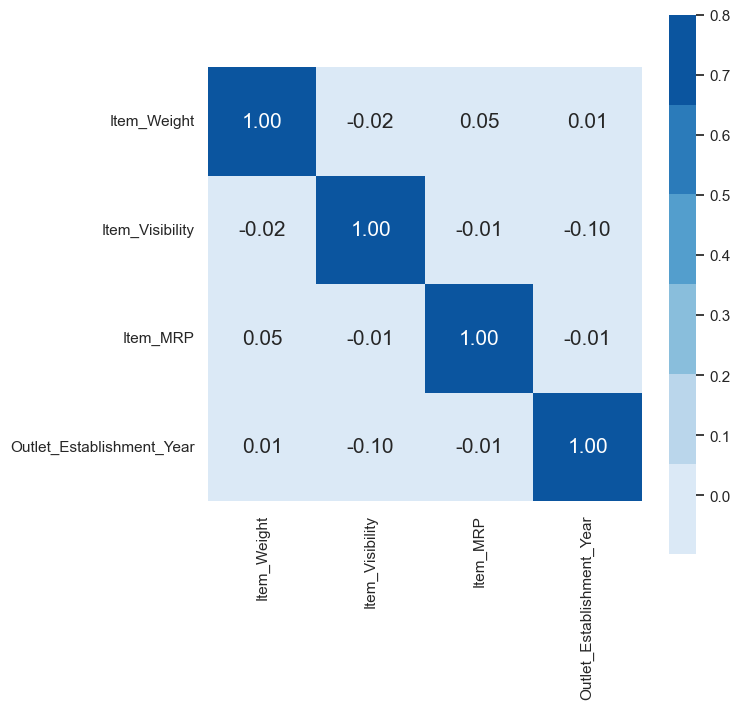

In [24]:
corr = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, vmax=.8, square=True, annot=True, fmt= '.2f',
            annot_kws={'size': 15}, cmap=sns.color_palette("Blues"))

Discussion: Based on the correlation heatmap, it is observed that there is a weak positive correlation of 0.05 between `Item_Weight` and `Item_MRP`. There is also a weak negative correlation of -0.1 between `Item_Visibility` and `Outlet_Establishment_Year`. Aside from that, there is no significant correlation between the numerical attributes

### Task 9

Create a scatter plot using the cleaned Test set. You are free to use any numerical attributes and categorical attributes. Explore for potential patterns and groupings and discuss your findings

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

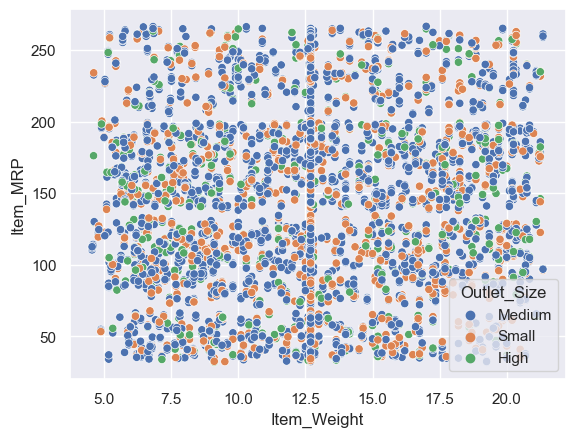

In [25]:
#Categorical attribute
catcol = 'Outlet_Size'
sns.scatterplot(x='Item_Weight', y='Item_MRP', hue=catcol,data=df)



In [19]:
df.dtypes

Item_Identifier                      object
Item_Weight                         float64
Item_Fat_Content                     object
Item_Visibility                     float64
Item_Type                            object
Item_MRP                            float64
Outlet_Identifier                    object
Outlet_Establishment_Year    datetime64[ns]
Outlet_Size                          object
Outlet_Location_Type                 object
Outlet_Type                          object
dtype: object

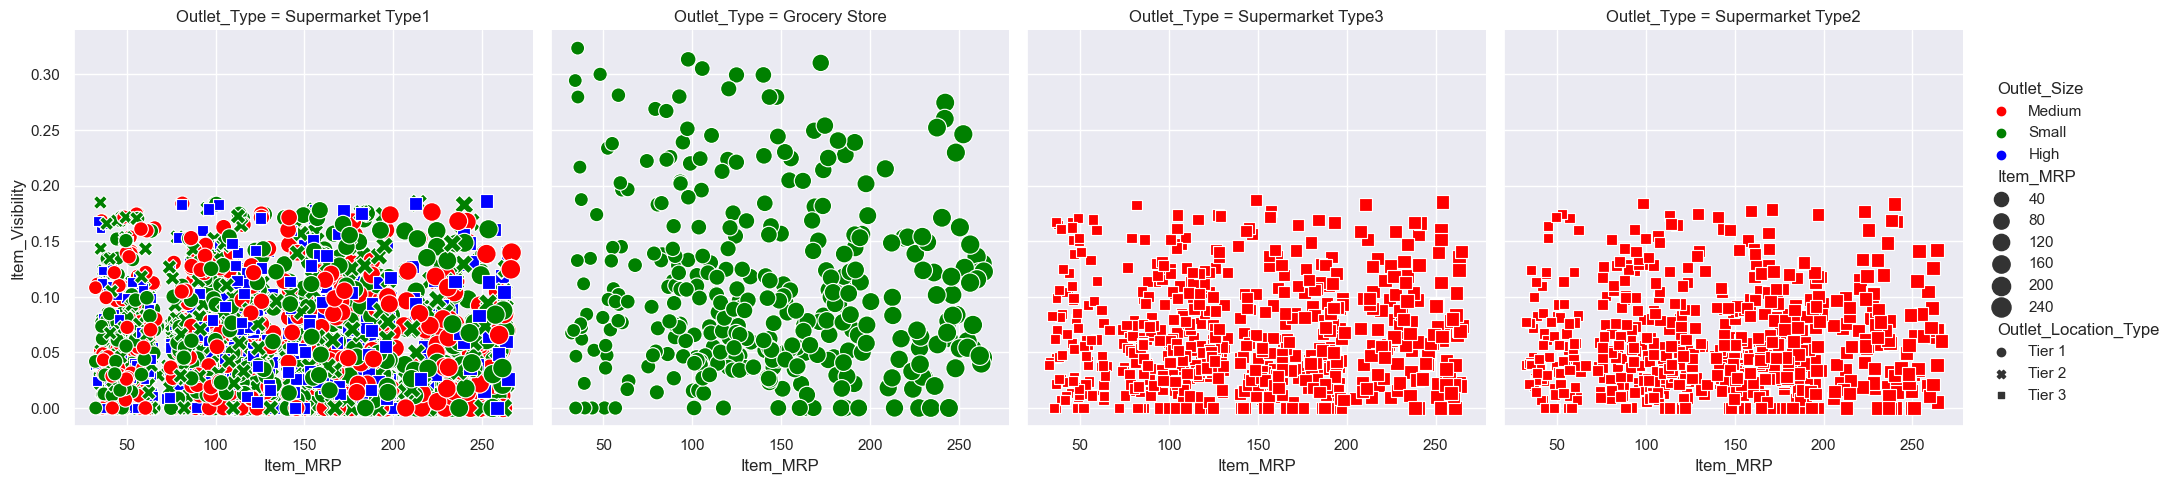

In [21]:
sns.relplot(x="Item_MRP", y="Item_Visibility", size="Item_MRP", data=df, palette=['red','green','blue'], hue='Outlet_Size', col ='Outlet_Type', sizes=(100,200), style='Outlet_Location_Type')

Discussion: Item Weight and Item MRP was chosen as it has a slight positive correlation as seen in the previous correlation heatmap. However, there is no distinct pattern or groupings that can be distinguished in the scatterplot above. 